In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

# Load data
sample_info = pd.read_csv('data/brain_sample_descriptions_PFC.csv')
gene_data = pd.read_csv('data/braindat.csv', index_col=0).T

# Merge datasets on common identifier
data = sample_info.merge(gene_data, left_on='!Sample_geo_accession', right_index=True, how='inner')
data['Sex'] = data['Sex'].map({'M': 1, 'F': 0})
data['Disease'] = data['Disease'].map({'A': 1, 'N': 0})

# Extract features and target variable
X = data.drop(columns=['Disease', '!Sample_title', '!Sample_geo_accession'])
X.columns = X.columns.astype(str)  # Ensure all feature names are strings
y = data['Disease']  # Assuming binary target variable

# Gradient Boosting Classifier
boosted_tree = GradientBoostingClassifier(random_state=42)
boosted_tree.fit(X, y)

KeyboardInterrupt: 


Top 30 Features by Importance:
            Feature  Importance
36775  10025934933    0.624330
20939  10025909808    0.050597
17816  10025906631    0.035701
9965   10023831601    0.023225
39005  10033668759    0.020323
4183   10023815322    0.020216
22026  10025910913    0.018285
2199   10023810110    0.017152
5836   10023819379    0.012375
9010   10023827344    0.011352
16997  10025905801    0.008919
5037   10023817381    0.008239
4485   10023816018    0.008137
3157   10023812578    0.007794
5486   10023818489    0.007150
25969  10025916012    0.006472
15521  10025904300    0.005823
2091   10023809844    0.005788
22245  10025911139    0.005392
7343   10023823173    0.005312
1532   10023808432    0.004771
25121  10025914571    0.004490
9149   10023827687    0.004368
11606  10023840862    0.004262
9697   10023830113    0.004024
35117  10025932010    0.003772
9952   10023831506    0.003711
34080  10025930204    0.003546
90     10023804764    0.003355
16096  10025904885    0.003266


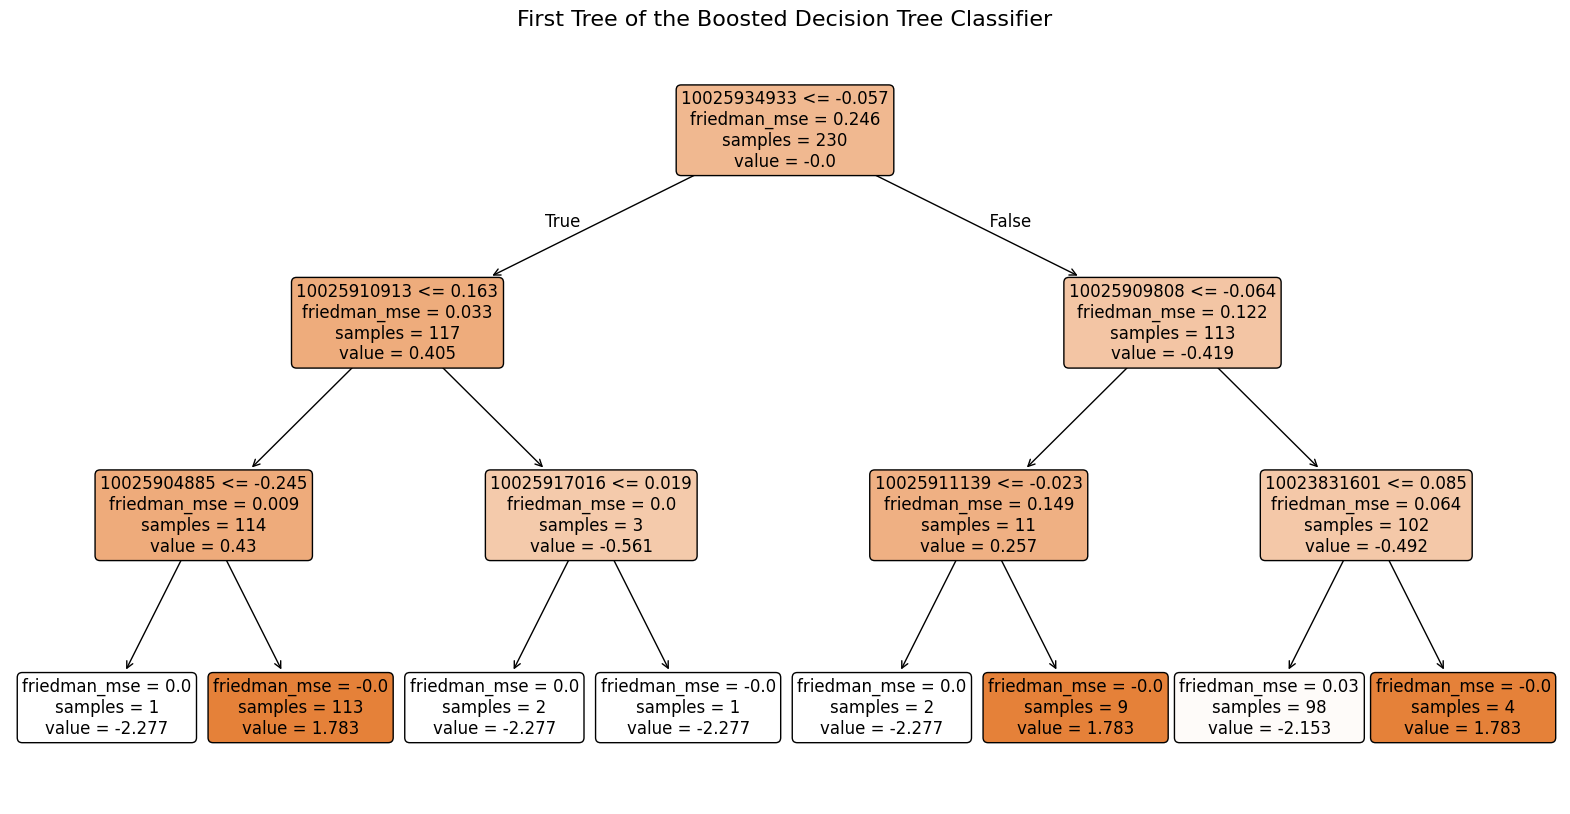

In [2]:
# Get and print feature importances
feature_importances = boosted_tree.feature_importances_
feature_importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importances
})

# Sort the features by importance and get the top 30
top_features = feature_importance_df.sort_values(by='Importance', ascending=False).head(30)
print("\nTop 30 Features by Importance:\n", top_features)

# Plot the first tree of the Gradient Boosting Classifier
plt.figure(figsize=(20, 10))
plot_tree(boosted_tree.estimators_[0, 0], 
          filled=True, 
          feature_names=X.columns, 
          class_names=['N', 'A'],  # Assuming 0 is 'N' and 1 is 'A'
          rounded=True, 
          fontsize=12,
          label='all')
plt.title('First Tree of the Boosted Decision Tree Classifier', fontsize=16)
plt.show()

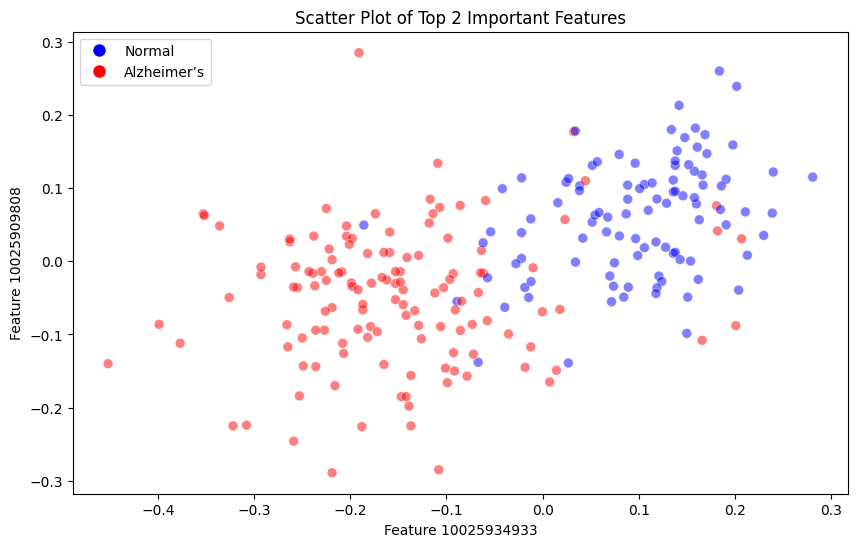

In [9]:
import seaborn as sns

top_features = ['10025934933', '10025909808']

cols = ["Alzheimer's" if i == 1 else "Normal" for i in y]

# Create scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X[top_features[0]], y=X[top_features[1]], c=pd.Series(cols).map({"Alzheimer's": 'red', "Normal": 'blue'}), s=50, alpha=0.5)
plt.xlabel(f'Feature {top_features[0]}')
plt.ylabel(f'Feature {top_features[1]}')
plt.title('Scatter Plot of Top 2 Important Features')
plt.legend(handles=[plt.Line2D([0], [0], marker='o', color='w', label='Normal', markersize=10, markerfacecolor='blue'),
                    plt.Line2D([0], [0], marker='o', color='w', label='Alzheimer’s', markersize=10, markerfacecolor='red')])
plt.show()

In [27]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

# Load data
sample_info = pd.read_csv('data/brain_sample_descriptions_PFC.csv')
gene_data = pd.read_csv('data/braindat.csv', index_col=0).T

# Merge datasets on common identifier
data = sample_info.merge(gene_data, left_on='!Sample_geo_accession', right_index=True, how='inner')
data['Sex'] = data['Sex'].map({'M': 1, 'F': 0})
data['Disease'] = data['Disease'].map({'A': 1, 'N': 0})

# Extract features and target variable
X = data.drop(columns=['Disease', '!Sample_title', '!Sample_geo_accession', 'Age', 'Sex'])
X.columns = X.columns.astype(str)  # Ensure all feature names are strings
y = data['Disease']  # Assuming binary target variable

# Standardize features for logistic regression
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [31]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegressionCV
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

num_c_vals = 100

# Define a range of inverse regularization strengths (C values)
C_values = np.logspace(-4, 4, num_c_vals)

# Perform Lasso logistic regression with cross-validation over a range of C values
# Setting penalty to 'l1' enables Lasso, solver 'liblinear' supports l1 penalty for logistic regression
lasso_cv = LogisticRegressionCV(
    Cs=C_values, cv=5, penalty='l1', solver='liblinear', scoring='neg_log_loss', max_iter=10000
)
lasso_cv.fit(X_scaled, y)

# Optimal lambda is the inverse of the best C found
optimal_lambda = 1 / lasso_cv.C_[0]
print("Optimal λ (lambda):", optimal_lambda)

Optimal λ (lambda): 3.351602650938841


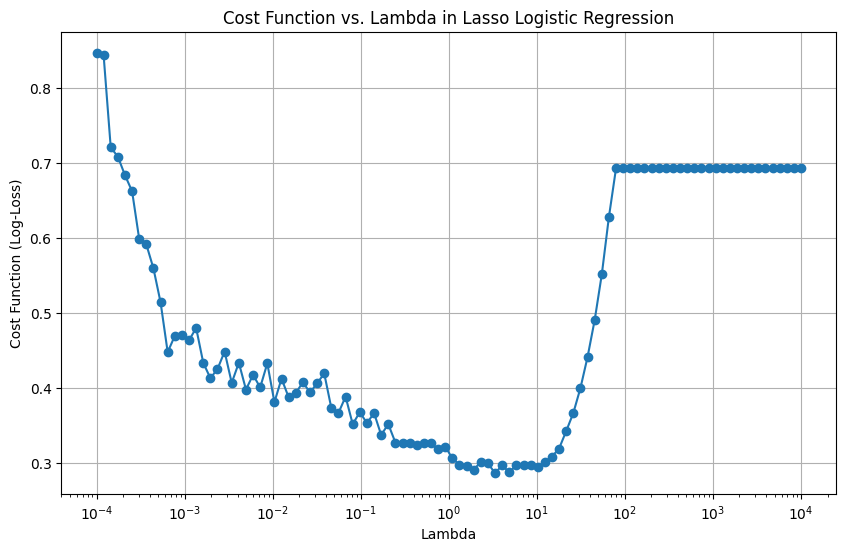

In [33]:
# Extract mean cross-validated scores for each C
mean_cost = -lasso_cv.scores_[1].mean(axis=0)  # Using log-loss scores; convert from negative

# Convert C values to lambda
lambda_values = 1 / lasso_cv.Cs_

# Plot cost function vs lambda
plt.figure(figsize=(10, 6))
plt.plot(lambda_values, mean_cost, marker='o')
plt.xscale('log')
plt.xlabel('Lambda')
plt.ylabel('Cost Function (Log-Loss)')
plt.title('Cost Function vs. Lambda in Lasso Logistic Regression')
plt.grid(True)
plt.show()


In [36]:
# Get the coefficients from the fitted model
coef = lasso_cv.coef_.flatten()

# Create a DataFrame with gene names and their coefficients, sorted by importance
gene_importance = pd.DataFrame({
    'Gene': X.columns,  # Replace with gene names or feature names
    'Coefficient': coef
})
# Filter out genes with a coefficient of zero (not selected by Lasso)
important_genes = gene_importance[gene_importance['Coefficient'] != 0]
# Sort by absolute value of the coefficient in descending order
important_genes = important_genes.reindex(important_genes.Coefficient.abs().sort_values(ascending=False).index)

# Set display options to show all rows and columns
pd.set_option('display.max_rows', None)  # or a large number if you want to limit it
pd.set_option('display.max_columns', None)

# Now you can print the important_genes DataFrame without truncation
print("Genes ordered by importance and their coefficients:")
print(important_genes)
print(important_genes.index)

# Optionally, you can reset the options back to default after printing if desired
pd.reset_option('display.max_rows')
pd.reset_option('display.max_columns')


Genes ordered by importance and their coefficients:
              Gene  Coefficient
12507  10023846112    -0.302713
35355  10025932435    -0.202785
20870  10025909739     0.196031
8119   10023825013     0.183708
27295  10025918353     0.164997
21399  10025910280     0.160882
32389  10025927197    -0.155656
33751  10025929611     0.151410
12021  10023843354     0.148582
29970  10025923022    -0.139590
2089   10023809844     0.135983
16403  10025905199     0.135502
7213   10023822880     0.124999
15094  10025903872     0.123682
33434  10025929055     0.117863
3824   10023814349     0.117454
27982  10025919551    -0.111119
18170  10025906991    -0.109923
38041  10031920282     0.105813
14294  10025903058     0.104843
38968  10033668724    -0.102446
32189  10025926848    -0.099609
19590  10025908435    -0.096543
1619   10023808677     0.096113
10244  10023833276    -0.095081
9208   10023827871     0.094537
11135  10023838154     0.091597
9950   10023831506     0.089901
4159   10023815265  

In [2]:
from sklearn.linear_model import LogisticRegressionCV
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

# Load data
sample_info = pd.read_csv('data/brain_sample_descriptions_PFC.csv')
gene_data = pd.read_csv('data/braindat.csv', index_col=0).T

# Merge datasets on common identifier
data = sample_info.merge(gene_data, left_on='!Sample_geo_accession', right_index=True, how='inner')
data['Sex'] = data['Sex'].map({'M': 1, 'F': 0})
data['Disease'] = data['Disease'].map({'A': 1, 'N': 0})

# Extract features and target variable
X = data.drop(columns=['Disease', '!Sample_title', '!Sample_geo_accession'])
X.columns = X.columns.astype(str)  # Ensure all feature names are strings
y = data['Disease']  # Assuming binary target variable


X_train, y_train = X, y



lasso_log_reg = LogisticRegressionCV(Cs=[1/3.35160], cv=5, penalty='l1', solver='liblinear', max_iter=10000).fit(X_train, y_train)



y_pred_train_lasso = lasso_log_reg.predict(X_train)
apparent_error_rate_lasso = 1 - accuracy_score(y_train, y_pred_train_lasso)

print("2")


cv_error_rate_lasso = 1 - cross_val_score(lasso_log_reg, X_train, y_train, cv=5).mean()


print("3")


boosted_trees = GradientBoostingClassifier().fit(X_train, y_train)

print("4")


y_pred_train_boost = boosted_trees.predict(X_train)
apparent_error_rate_boost = 1 - accuracy_score(y_train, y_pred_train_boost)

print("5")


cv_error_rate_boost = 1 - cross_val_score(boosted_trees, X_train, y_train, cv=5).mean()

print("6")


# Print results
print("Lasso Logistic Regression - Apparent Error Rate:", apparent_error_rate_lasso)
print("Lasso Logistic Regression - CV Error Rate:", cv_error_rate_lasso)
print("Boosted Trees - Apparent Error Rate:", apparent_error_rate_boost)
print("Boosted Trees - CV Error Rate:", cv_error_rate_boost)


data split
1
2
3
6
Lasso Logistic Regression - Apparent Error Rate: 0.08260869565217388
Lasso Logistic Regression - CV Error Rate: 0.09999999999999998
Boosted Trees - Apparent Error Rate: 0.0
Boosted Trees - CV Error Rate: 0.17826086956521725


Lasso Logistic Regression - Apparent Error Rate: 0.06956521739130439
Lasso Logistic Regression - CV Error Rate: 1.256819358250193
Boosted Trees - Apparent Error Rate: 0.0
Boosted Trees - CV Error Rate: 0.17826086956521725

In [9]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegressionCV
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.preprocessing import StandardScaler

# Load data
sample_info = pd.read_csv('data/brain_sample_descriptions_PFC.csv')
gene_data = pd.read_csv('data/braindat.csv', index_col=0).T

# Merge datasets on common identifier
data = sample_info.merge(gene_data, left_on='!Sample_geo_accession', right_index=True, how='inner')
data['Sex'] = data['Sex'].map({'M': 1, 'F': 0})
data['Disease'] = data['Disease'].map({'A': 1, 'N': 0})

# Extract features and target variable
X = data.drop(columns=['Disease', '!Sample_title', '!Sample_geo_accession'])
X.columns = X.columns.astype(str)  # Ensure all feature names are strings
y = data['Disease']  # Assuming binary target variable

# Standardize features for Lasso Logistic Regression
scaler = StandardScaler()
X_scaled = X

# Initialize models
lasso_logistic = LogisticRegressionCV(Cs=[1/3.35160], cv=5, penalty='l1', solver='liblinear', max_iter=10000)
boosted_trees = GradientBoostingClassifier()

# Set up K-Fold CV
kf = StratifiedKFold(n_splits=5)
class_names = np.unique(y)
cv_results = {
    "lasso_logistic": {"overall_error": [], "class_error": {cls: [] for cls in class_names}},
    "boosted_trees": {"overall_error": [], "class_error": {cls: [] for cls in class_names}},
}

# Perform CV for each model
for train_index, test_index in kf.split(X, y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]


    # Standardize features for Lasso
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    # Train Lasso Logistic Regression and Boosted Trees
    lasso_logistic.fit(X_train_scaled, y_train)
    boosted_trees.fit(X_train, y_train)

    # Get predictions
    lasso_preds = lasso_logistic.predict(X_test_scaled)
    boosted_preds = boosted_trees.predict(X_test)

    # Calculate overall error rates
    cv_results["lasso_logistic"]["overall_error"].append(1 - accuracy_score(y_test, lasso_preds))
    cv_results["boosted_trees"]["overall_error"].append(1 - accuracy_score(y_test, boosted_preds))

    # Calculate class-specific error rates
    for cls in class_names:
        lasso_class_error = (lasso_preds[y_test == cls] != cls).mean()
        boosted_class_error = (boosted_preds[y_test == cls] != cls).mean()
        cv_results["lasso_logistic"]["class_error"][cls].append(lasso_class_error)
        cv_results["boosted_trees"]["class_error"][cls].append(boosted_class_error)

# Summarize CV results
def summarize_results(cv_results):
    summary = {}
    for model in cv_results:
        summary[model] = {
            "overall_error": np.mean(cv_results[model]["overall_error"]),
            "class_error": {cls: np.mean(errors) for cls, errors in cv_results[model]["class_error"].items()},
        }
    return summary

cv_summary = summarize_results(cv_results)

# Train on the entire dataset for apparent error
# Lasso Logistic Regression (full dataset)
lasso_logistic.fit(X_scaled, y)
lasso_apparent_preds = lasso_logistic.predict(X_scaled)
lasso_apparent_error = 1 - accuracy_score(y, lasso_apparent_preds)

# Boosted Trees (full dataset)
boosted_trees.fit(X, y)
boosted_apparent_preds = boosted_trees.predict(X)
boosted_apparent_error = 1 - accuracy_score(y, boosted_apparent_preds)

# Calculate apparent class-specific errors
lasso_class_apparent_error = {cls: (lasso_apparent_preds[y == cls] != cls).mean() for cls in class_names}
boosted_class_apparent_error = {cls: (boosted_apparent_preds[y == cls] != cls).mean() for cls in class_names}

# Display results
print("Cross-Validation Results:")
print(cv_summary)
print("\nApparent Error Rates:")
print(f"Lasso Logistic Regression - Overall: {lasso_apparent_error}, Class-specific: {lasso_class_apparent_error}")
print(f"Boosted Trees - Overall: {boosted_apparent_error}, Class-specific: {boosted_class_apparent_error}")


Cross-Validation Results:
{'lasso_logistic': {'overall_error': np.float64(0.10434782608695654), 'class_error': {np.int64(0): np.float64(0.08), np.int64(1): np.float64(0.12461538461538461)}}, 'boosted_trees': {'overall_error': np.float64(0.43913043478260877), 'class_error': {np.int64(0): np.float64(1.0), np.int64(1): np.float64(0.0)}}}

Apparent Error Rates:
Lasso Logistic Regression - Overall: 0.07826086956521738, Class-specific: {np.int64(0): np.float64(0.09900990099009901), np.int64(1): np.float64(0.06201550387596899)}
Boosted Trees - Overall: 0.4391304347826087, Class-specific: {np.int64(0): np.float64(1.0), np.int64(1): np.float64(0.0)}


In [13]:
# Data for the three methods
# method0_genes = [
#     10025917759, 10025923543, 10025933262, 10025903623, 10023840316, 
#     10025918072, 10023845539, 10031920520, 10025905014, 10025927665, 
#     10025919870, 10025933842, 10025908366, 10025933684, 10023824669, 
#     10023808999, 10023844477, 10031920799, 10023828795, 10025930528, 
#     10025931010, 10023812516, 10025930165, 10025923634, 10025917423, 
#     10031919754, 10025911929, 10031919804, 10025924033, 10025920585
# ]

method1_genes = [
    10025908435, 10023816018, 10025923114, 10026391091, 10033668510, 10023815322,
    10025910394, 10025906503, 10025934933, 10025910121, 10025908598, 10033668850,
    10023819474, 10023822632, 10025905029, 10025911097, 10025908549, 10033668934,
    10025904757, 10023829361, 10025903807, 10023836747, 10025904476, 10031919807,
    10023812264, 10025911867, 10025909612, 10023827871, 10023820526, 10023824420
]

method2_genes = [
    10025929611, 10023814349, 10025918353, 10023828793, 10023833276, 10023827871,
    10023824734, 10025932435, 10025927197, 10025926848, 10023839230, 10025923022,
    10025908601, 10025928439, 10025919551, 10025903058, 10025912500, 10025904476,
    10023809844, 10025910723, 10023836075, 10033668936, 10023842801, 10025908435,
    10023823964, 10033668724, 10025904331, 10025909739, 10023822775, 10025910280
]

method3_genes = [
    10025934933, 10025909808, 10025906631, 10023831601, 10033668759, 10023815322,
    10025910913, 10023810110, 10023819379, 10023827344, 10025905801, 10023817381,
    10023816018, 10023812578, 10023818489, 10025916012, 10025904300, 10023809844,
    10025911139, 10023823173, 10023808432, 10025914571, 10023827687, 10023840862,
    10023830113, 10025932010, 10023831506, 10025930204, 10023804764, 10025904885
]

# Function to assign scores
def assign_scores(gene_list):
    return {gene: score for gene, score in zip(gene_list, range(30, 0, -1))}

# Assign scores to each method
#scores_method0  = assign_scores(method0_genes)
scores_method1 = assign_scores(method1_genes)
scores_method2 = assign_scores(method2_genes)
scores_method3 = assign_scores(method3_genes)

# Sum up scores across methods
combined_scores = {}
for gene_dict in [scores_method1, scores_method2, scores_method3]:
    for gene, score in gene_dict.items():
        combined_scores[gene] = combined_scores.get(gene, 0) + score

# Find the highest scoring genes
top_genes = sorted(combined_scores.items(), key=lambda x: x[1], reverse=True)[:10]

# Report the top genes and their scores
for gene, score in top_genes:
    print(f"GeneID: {gene}, Total Score: {score}")


GeneID: 10025934933, Total Score: 52
GeneID: 10023815322, Total Score: 50
GeneID: 10023816018, Total Score: 47
GeneID: 10025908435, Total Score: 37
GeneID: 10025929611, Total Score: 30
GeneID: 10023814349, Total Score: 29
GeneID: 10025909808, Total Score: 29
GeneID: 10025923114, Total Score: 28
GeneID: 10023827871, Total Score: 28
GeneID: 10025918353, Total Score: 28
